[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1JuiXnrL99eZzIiRzdtREyLlCYhF6Nc4u?usp=sharing)

# Évaluation des performances, validation croisée et réglage des hyperparamètres
Dans ce cahier, nous allons apprendre 3 choses:
* Métriques d'évaluation
* Validation croisée
* Réglage des hyperparamètres

### Description des données
Ici, nous utiliserons l'ensemble de données sur le diabète pour la classification. Compte tenu des différentes spécifications médicales d'une personne, nous devons prédire si la personne est diabétique ou non.

**Différents attributs:**
1. Nombre de fois enceinte
2. Concentration de glucose plasmatique a 2 heures dans un test oral de tolérance au glucose
3. Tension artérielle diastolique (mm Hg)
4. Épaisseur du pli cutané du triceps (mm)
5. Insuline sérique 2 heures (mu U / ml)
6. Indice de masse corporelle (poids en kg / (taille en m) ^ 2)
7. Fonction généalogique du diabète
8. Âge (années)
9. Variable de classe (0 ou 1)

Tous les noms de fonction sont numériques. Donnons des noms textuels à ces fonctionnalités.
* Nombre de fois enceinte: **num_preg**
* Concentration de glucose plasmatique a 2 heures dans un test oral de tolérance au glucose: **plasma_glucose_conc**
* Tension artérielle diastolique (mm Hg): **D_blood_pressure**
* Épaisseur du pli cutané du triceps (mm): **skin_fold_thickness**
* Insuline sérique 2 heures (mu U / ml): **sérum_insuline**
* Indice de masse corporelle (poids en kg / (taille en m) ^ 2): **body_mass_index**
* Fonction pedigree du diabète: **pedigree_func**
* Âge (années): **âge**
* Variable de classe (0 ou 1): **diabète**

### Charger les bibliothèques

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Chargement des données

In [ ]:
# since the column names are numerical, we will give our own column names for our understanding
col = ["num_preg", "plasma_glucose_conc", "D_blood_pressure", "skin_fold_thickness", "serum_insulin", "body_mass_index", "pedigree_func", "age", "diabetes"]
diabetes_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/ML_Models/master/Performance_Evaluation/diabetes.txt", names = col)

In [ ]:
diabetes_data.head()

,num_preg,plasma_glucose_conc,D_blood_pressure,skin_fold_thickness,serum_insulin,body_mass_index,pedigree_func,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Cet ensemble de données contient 13 colonnes et en fonction de différentes caractéristiques, on devine si une personne est diabétique ou non**

### Séparation des variables d'entrée et de la variable de sortie

In [ ]:
X = diabetes_data.drop('diabetes', axis = 1)
y = diabetes_data.diabetes

#### Split into training and testing (80:20)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# The below line of code will not need to separate input variables and output variables.
# The code is very simple if you remember numpy and pandas session. Indexing dataframe and arrays
# x_train, x_test, y_train, y_test = train_test_split(diabetes.iloc[:, :-1], diabetes.iloc[:,-1], test_size=0.2, random_state=3)

**Note pour les apprenants:** Ici, nous avons utilisé MLPClassifier du module neural_network de la bibliothèque sklearn. MLP Classifier est également un algorithme de classification comme la régression logistique ou l'arbre de décision. Nous en apprendrons bientôt davantage sur les réseaux de neurones et les réseaux de neurones artificiels dans les prochaines sessions. Donc, pas besoin de vous en inquiéter.

### Développer un modèle

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

## Évaluation des performances
L'évaluation des performances du modèle d'apprentissage automatique que nous avons construit est une partie essentielle de tout projet d'apprentissage automatique. Les performances de notre modèle sont effectuées à l'aide de certaines mesures d'évaluation. Le score de précision est l'un d'entre eux.

**Pourquoi le score de précision n'est-il pas une bonne mesure d'évaluation?**

Notre modèle peut donner des résultats satisfaisants si nous utilisons le score de précision pour un ensemble de données particulier, mais en même temps, le score de précision n'est pas une bonne mesure d'évaluation pour un ensemble de données particulier comme la détection de fraude dont nous avons discuté lors du problème de déséquilibre de classe. Considérons le même ensemble de données, supposons que nous ayons 1000 transactions dans l'ensemble de données. Sur 1000 transactions, 20 transactions sont des transactions frauduleuses. Supposons maintenant que vous construisiez un modèle qui prédit que toutes les 1000 transactions ne sont pas des transactions frauduleuses, pour 980 transactions qui n'étaient pas des fraudes, la prédiction est correcte tandis que les transactions qui étaient en réalité des fraudes sont également prédites comme des non-fraudes. La précision n'est rien d'autre qu'une prédiction correcte totale divisée par une prédiction totale. Dans ce cas, nous avons une prédiction totale de 1000 (car nous avons 1000 transactions) tandis que la prédiction totale correcte est de 980, ce qui donne un score de précision de 980/1000 = 0,98. Le modèle donne 98% de précision. Pensez-vous que le modèle est bon? Non, car notre modèle ne pouvait pas remarquer la transaction qui était en fait une fraude.

Ici, nous discuterons d'autres métrices pour la classification et la régression.

## 1. Paramètres d'évaluation

**Toutes les mesures de performance dans sklearn doivent être écrites de la même manière -**
> `` `` metric_function (true_label, preded_labels) `` ``

Vous trouverez ci-dessous les mesures des problèmes de classification.

### Matrice de confusion
Une matrice de confusion est un tableau qui est souvent utilisé pour décrire les performances d'un modèle de classification (ou «classificateur») sur un ensemble de données de test dont les vraies valeurs sont connues. La matrice de confusion elle-même est relativement simple à comprendre, mais la terminologie associée peut prêter à confusion.

Lectures complémentaires sur la matrice de confusion et ses terminologies associées:
1. https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
2. https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[43, 49],
       [14, 48]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()     # ravel() is used to convert a 2D array to 1D array. The output by confusion matrix is a 2D array.
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 48
True Negative 43
False Positive 49
False Negative 14


### Précision
\begin{align}
Précision = \frac{TP+TN}{TP+TN+FN+FP}
\end{align}

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.5909090909090909

**Quand est-il bon d'utiliser le score d'exactitude comme mesure d'évaluation du modèle?**
1. Les classifications dans l'ensemble de données sont presque symétriques (signifie une distribution égale de toutes les classes).
2. Les faux positifs et faux négatifs sur les données de test sont presque égaux.

### Rappel (sensibilité)
\begin{align}
Sensibilité = \frac{TP}{TP+FN}
\end{align}

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_test, y_pred)

0.7741935483870968

### Spécificité
sklearn n'a pas de fonction inbuild pour la spécificité. Mais en ajoutant le paramètre pos_label = 0 à la fonction de rappel, nous traitons cela comme la classe positive, et donc donne la sortie correcte
\begin{align}
Spécificité = \frac{TN}{TN+FP}
\end{align}

In [ ]:
print("Specificity with recall pos label=0: ",recall_score(y_test, y_pred, pos_label=0))

Specificity with recall pos label=0:  0.4673913043478261


**Vérification avec des formules (tn, fp de la matrice de confusion):**

In [ ]:
print("Specificity with Formulas: ", tn/(tn+fp))

Specificity with Formulas:  0.4673913043478261


Ce sont les mêmes! Vous pouvez utiliser l'un ou l'autre d'entre eux!

### Précision
\begin{align}
Précision = \frac{TP}{TP+FP}
\end{align}

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.4948453608247423

In [ ]:
tp / (tp + fp)

0.4948453608247423

### Ensembles de données déséquilibrés

In [ ]:
diabetes_data.iloc[:,-1].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

### Matthews Correlation Coefficient
\begin{align}
MCC = \frac{(TP*TN)-(FP*FN)}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}
\end{align}

In [ ]:
from sklearn.metrics import matthews_corrcoef
print("MCC Score: ",matthews_corrcoef(y_test, y_pred))

MCC Score:  0.24537830614198208


### Score F1
C'est la moyenne harmonique de la précision et du rappel

\begin{align}
Precision = \frac{2*Precision*Recall}{Precision+Recall}
\end{align}

In [ ]:
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_test, y_pred))

F1 Score:  0.6037735849056605


## Zone sous la courbe (caractéristiques de fonctionnement du récepteur)

In [ ]:
from sklearn.metrics import plot_roc_curve

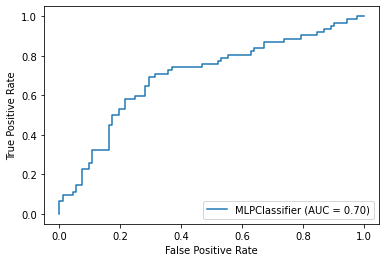

In [ ]:
plot_roc_curve(mlp, x_test, y_test)
plt.show()

## 1.2 Métriques d'évaluation de la régression

Ensemble de données sur le vin
    <b> Predictor Variable: </b> Quality (Tells quality of wine)

In [ ]:
wine = pd.read_csv("https://raw.githubusercontent.com/dphi-official/ML_Models/master/Performance_Evaluation/winequality.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Variables d'entrée et de sortie séparées

In [ ]:
X = wine.drop('quality', axis = 1)
y = wine.quality

#### Divisé en formation et test (80:20)

In [ ]:
# Here we are performing both separation of input and output variable and the splitting.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

Créer un modèle

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred[:10]

array([5.44455619, 5.57868309, 5.99091469, 5.19864346, 6.0666099 ,
       5.01639077, 5.68416174, 6.26611011, 5.97010538, 5.65519351])

## Mesure du rendement

Let y = Actual Value,  $\tilde{y}$ = Predicted Value

### Erreur absolue moyenne
* MAE est la différence absolue entre la valeur cible et la valeur prédite par le modèle.
* Le MAE est plus robuste aux valeurs aberrantes et ne pénalise pas les erreurs aussi fort que mse
\begin{align}
MAE  = \frac{1}{n}\sum|y-\tilde{y}| 
\end{align}

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.5972358558776472

### Erreur quadratique moyenne
* Il s'agit simplement de la moyenne de la différence au carré entre la valeur cible et la valeur prédite par le modèle de régression.
* En corrigeant les différences, cela pénalise même une petite erreur qui conduit à une surestimation de la gravité du modèle.
* MSE ou erreur quadratique moyenne est l'une des mesures les plus préférées pour les tâches de régression.
\begin{align}
MSE & = \frac{1}{n}\sum(y-\tilde{y})^2
\end{align}

In [ ]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))

Mean Squared Error:  0.5906658099548077


### Erreur quadratique moyenne
* RMSE est la racine carrée de la différence quadratique moyenne entre la valeur cible et la valeur prédite par le modèle.
* Il est préférable dans certains cas car les erreurs sont d'abord mises au carré avant le calcul de la moyenne, ce qui entraîne une forte pénalité sur les erreurs importantes.
* Cela implique que RMSE est utile lorsque des erreurs importantes ne sont pas souhaitées.
\begin{align}
RMSE  = \sqrt{\frac{1}{n}\sum(y-\tilde{y})^2}
\end{align}

In [ ]:
print("Root Mean Squared Error: ",mean_squared_error(y_test, y_pred, squared=False))

Root Mean Squared Error:  0.7685478579469256


### R au carré
<li> La métrique nous aide à comparer notre modèle actuel avec une ligne de base constante et nous indique à quel point notre modèle est meilleur
\begin{align}
R^2 = 1 - \frac{MSE(Model)}{MSE(Baseline)}
\end{align}

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2832037191111023

# 2. Validation croisée
Habituellement, nos données sont divisées en Train et Test Sets.
L'ensemble de train est divisé en train et ensemble de validation.

L'ensemble de validation nous aide à sélectionner de bons paramètres / à ajuster les paramètres de notre modèle.

Cet ensemble à trois volets peut être vu dans la figure ci-dessous:

![train-test-val](https://amueller.github.io/ml-training-intro/slides/images/threefold_split.png)

Notre ensemble de données doit être aussi grand que possible pour entraîner le modèle et en supprimer une partie considérable pour validation pose un problème de perte d'une partie précieuse de données que nous préférerions pouvoir entraîner.

Afin de résoudre ce problème, nous utilisons la technique de validation croisée. La validation croisée a un certain nombre de types parmi lesquels nous utiliserons la validation croisée K-fold aujourd'hui.



In [ ]:
# Here the diabetes data is use
# separate input and output vairables
X = diabetes_data.drop('diabetes', axis = 1)
y = diabetes_data.diabetes

### 2.1 Validation croisée du pli en K

In [ ]:
from sklearn.model_selection import cross_validate

<blockquote> Nous pouvons également importer cross_val_score depuis la même bibliothèque, mais cela ne permet d'implémenter qu'un seul scorer. Nous utilisons donc cross_validate </blockquote>

In [ ]:
cv_results = cross_validate(mlp, X, y, cv=10, scoring=["accuracy", "precision", "recall"])
cv_results

{'fit_time': array([0.71222353, 0.28113151, 0.27015281, 0.53144264, 0.58878517,
        0.7093277 , 0.38992119, 0.50623631, 0.50488782, 0.43695211]),
 'score_time': array([0.00470662, 0.00444794, 0.0044117 , 0.0046351 , 0.00443244,
        0.00435042, 0.00445032, 0.0045352 , 0.00460291, 0.00442624]),
 'test_accuracy': array([0.67532468, 0.66233766, 0.66233766, 0.68831169, 0.72727273,
        0.7012987 , 0.76623377, 0.74025974, 0.67105263, 0.75      ]),
 'test_precision': array([0.53571429, 0.51851852, 0.51515152, 0.58823529, 0.625     ,
        0.7       , 0.64516129, 0.68421053, 0.51724138, 0.70588235]),
 'test_recall': array([0.55555556, 0.51851852, 0.62962963, 0.37037037, 0.55555556,
        0.25925926, 0.74074074, 0.48148148, 0.57692308, 0.46153846])}

**cv = 10 est fourni, ce qui signifie que nous effectuons une validation croisée 10 fois**

In [ ]:
print("Accuracy: ", cv_results["test_accuracy"].mean())
print("Precision: ", cv_results["test_precision"].mean())
print("Recall: ", cv_results["test_recall"].mean())

Accuracy:  0.7044429254955571
Precision:  0.6035115162391859
Recall:  0.5149572649572649


**Pour toutes les options de notation valides - utilisez les éléments suivants:**

In [ ]:
import sklearn.metrics as m
m.SCORERS.keys()


dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

Pour des métriques de scoring plus compliquées (comme la spécificité, qui n'est pas explicitement fournie par sklearn), ou pour créer vos propres métriques,
http://scikit-learn.org/stable/modules/model_evaluation.html#using-multiple-metric-evaluation

### 2.2 Validation croisée à exclure

<blockquote> Ce code prend beaucoup de temps à s'exécuter, vous pouvez soit ignorer l'exécution de cette partie et voir directement les résultats imprimés, soit attendre 10 à 15 minutes pour que cela s'exécute </blockquote>

In [ ]:
from sklearn.model_selection import LeaveOneOut

In [ ]:
cv_results = cross_validate(mlp, X, y,
                            cv=LeaveOneOut(), scoring=["accuracy"])
cv_results

{'fit_time': array([0.54535079, 0.5752933 , 0.71073174, 0.33698487, 0.58281159,
        0.3993566 , 0.76314974, 0.69838762, 0.49601626, 0.63538527,
        0.9600904 , 0.58919239, 0.68060994, 0.56826591, 0.49913931,
        0.21703815, 0.98201919, 0.3034234 , 0.52994657, 0.38744879,
        0.71416831, 0.34552741, 0.0592134 , 0.77077198, 0.82220578,
        0.68921804, 0.4818368 , 0.65259147, 0.54856849, 0.41701102,
        0.75025892, 0.605407  , 0.62205482, 0.27240896, 0.69677138,
        0.71997547, 0.24220228, 0.53892565, 0.6946311 , 0.64098907,
        0.68516278, 0.52363801, 0.61211181, 0.34277987, 0.46727824,
        0.42548013, 0.34917736, 0.49840045, 0.32899809, 0.33908629,
        0.67891002, 0.4307127 , 0.68910599, 0.42842364, 0.36996126,
        0.27344131, 0.38640308, 0.52115798, 0.21037555, 0.8298831 ,
        0.52916932, 0.39916658, 0.5670042 , 0.49933243, 0.35077095,
        0.36177826, 0.45668697, 0.42439723, 0.54657006, 0.54131746,
        0.33516312, 0.49887586, 0.21

In [ ]:
cv_results['test_accuracy'].mean()

0.6901041666666666

Nous n'avons pas inclus la précision et le rappel dans les métriques ici. Peux-tu penser pourquoi?
**<mark> Astuce: </mark> Imaginez la matrice de confusion lorsque le test n'a qu'un seul échantillon**

## 3. Réglage des hyperparamètres
Les hyperparamètres sont des éléments importants du modèle ML et peuvent rendre le modèle or ou poubelle. Ici, nous avons discuté de l'une des méthodes de réglage d'hyperparamètres les plus populaires, à savoir l'utilisation de Grid Search CV.

## 3.1 Grid Search CV

### 3.1.1 Taux de criminalité - Régression linéaire

**Variable prédictive: Taux de criminalité (basé sur la régression)**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
crime = pd.read_csv("https://raw.githubusercontent.com/dphi-official/ML_Models/master/Performance_Evaluation/Standard%20Metropolitan%20Areas%20Data%20-%20train_data.csv")
train, test = train_test_split(crime)
x_train = train.drop('crime_rate', axis = 1)     
y_train = train.crime_rate      
x_test = test.drop('crime_rate', axis = 1)      
y_test = test.crime_rate        

Performances sans recherche de grille:

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred, squared=False)

11.54960166401792

Performances avec la recherche de grille

**Étape 1:** Définir un paramètre Espace

In [ ]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False], 'n_jobs':[-1,1,10,15]}

**Étape 2:** Ajustez le modèle pour trouver les meilleurs hyperparamètres sur les données d'entraînement et sélectionnez le marqueur que vous souhaitez sélectionner pour optimiser

In [ ]:
grid = GridSearchCV(lr,parameters, cv=3)
grid.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [-1, 1, 10, 15],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**Étape 3:** Imprimez les meilleurs paramètres obtenus

In [ ]:
grid.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [ ]:
grid_lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
grid_lr.fit(x_train, y_train)
y_pred= grid_lr.predict(x_test)
mean_squared_error(y_test, y_pred, squared=False)

11.54960166401792

**Les performances ne varient pas beaucoup!**

Le nombre d'hyperparamètres pour la régression linéaire est très inférieur. Par conséquent, tous donnent des performances similaires (dans cet ensemble de données spécifique)

Essayons un autre paramètre dont les performances varient beaucoup!

### 3.1.2 Réseau neuronal artificiel
Dans la régression linéaire, il n'y a pas beaucoup de paramètres à optimiser, donc les performances peuvent ne pas varier beaucoup. Dans de nombreux autres classificateurs, il existe un certain nombre d'hyper paramètres à régler, alors voyons un exemple de la façon dont les performances sont améliorées à l'aide de la recherche de grille. Nous prenons un exemple de **Réseaux de neurones artificiels.**

Vous n'avez pas besoin de comprendre le fonctionnement derrière ANN, donc ce n'est pas grave si vous ne comprenez pas la grille de paramètres en détail. Voyons simplement comment les performances s'améliorent en appliquant Grid Search.

In [ ]:
# Use diabetes data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

**Étape 1:** Définir un paramètre Espace

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

**Étape 2:** Ajustez le modèle pour trouver les meilleurs hyperparamètres sur les données d'entraînement et sélectionnez le marqueur que vous souhaitez sélectionner pour optimiser

<blockquote> <i> Ce code prend beaucoup de temps à s'exécuter, vous pouvez soit ignorer l'exécution de cette partie et voir directement les résultats imprimés, soit attendre 10 à 15 minutes pour que cela s'exécute </blockquote>

In [ ]:
mlp_random = GridSearchCV(mlp, parameter_space, scoring = 'accuracy')
mlp_random.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_s...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05]

**Étape 3:** Imprimez les meilleurs paramètres obtenus

In [ ]:
mlp_random.best_params_

{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

**Étape 4:** Entraînez votre modèle sur ces paramètres

In [ ]:
mlp_grid = MLPClassifier(solver='adam', learning_rate='constant', hidden_layer_sizes=(100,), alpha=0.0001, 
                         activation='tanh',max_iter=2000)

In [ ]:
mlp_grid.fit(x_train, y_train)
y_pred = mlp_grid.predict(x_test)
acc_tuned = accuracy_score(y_test, y_pred)

**Comparaison avec la précision du modèle sans réglage des hyperparamètres**

In [ ]:
print("Accuracy of Tuned model: ",np.round(acc_tuned,3))
print("Accuracy of non-Tuned model: ",np.round(acc,3))

Accuracy of Tuned model:  0.701
Accuracy of non-Tuned model:  0.591


Différence de précision d'environ 5%!
En incluant une recherche de grille encore plus exhaustive, nous pouvons encore améliorer les performances